In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [15]:
csv_path = "subdataset.csv"
df = pd.read_csv(csv_path)
print(df.shape)
df.head()

(1168, 15)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,145000
1,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,178000
2,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,85000
3,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,175000
4,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,127000


In [16]:
# Selecting only numeric columns 

numeric_df = df.select_dtypes(include=[np.number]).copy()
numeric_df.info()
numeric_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1168 non-null   int64  
 1   LotFrontage  951 non-null    float64
 2   LotArea      1168 non-null   int64  
 3   SalePrice    1168 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 36.6 KB


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.849315,42.531862,20.0,20.00,50.0,70.0,190.0
LotFrontage,951.0,70.343849,24.897021,21.0,59.00,70.0,80.0,313.0
LotArea,1168.0,10689.642123,10759.366198,1300.0,7587.25,9600.0,11700.0,215245.0
SalePrice,1168.0,181441.541952,77263.583862,34900.0,130000.00,165000.0,214925.0,745000.0


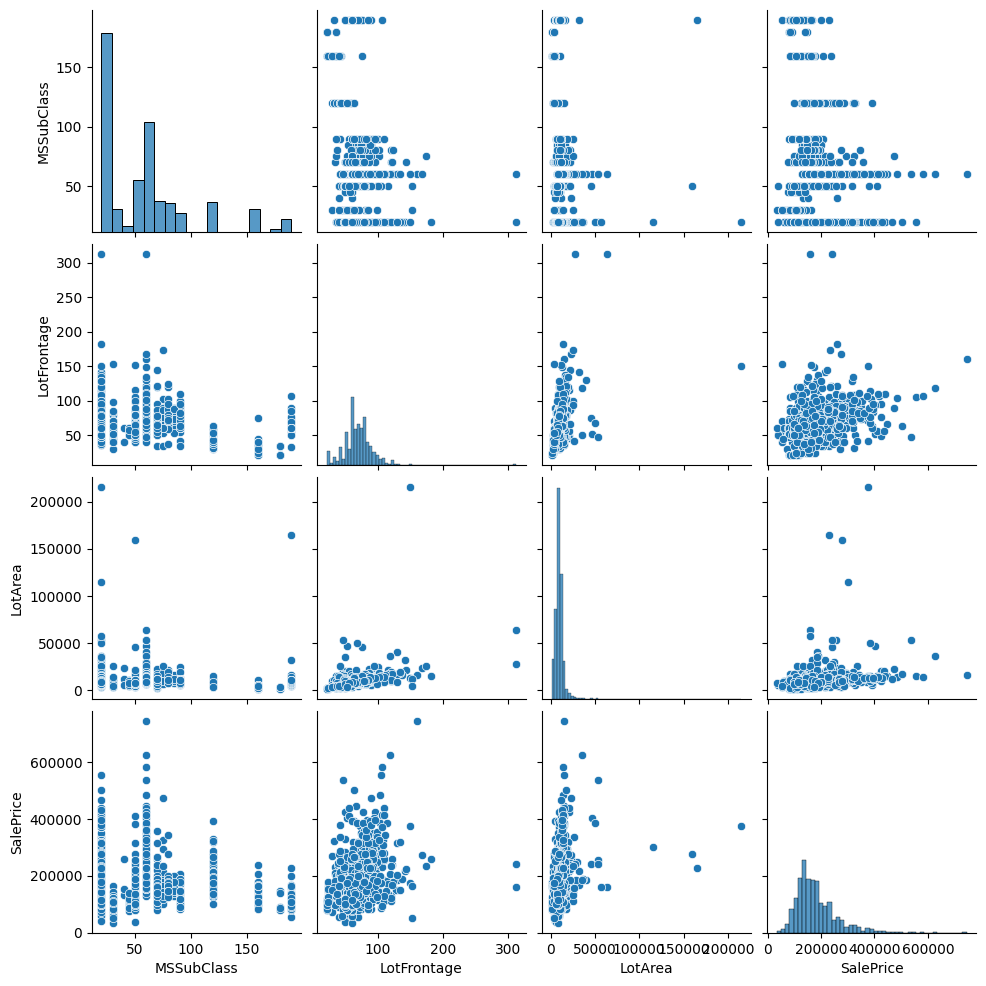

In [17]:
# Pairplot 

sns.pairplot(numeric_df)

### Relatia dintre *SalesPrice* si fiecare variabila numerica 

- **SalePrice ~ LotArea:** preturile tind sa fie mai mari pentru parcelele cu suprafete mai mari, dar relatia nu este una perfect liniara ( exista si outlieri )
- **SalePrice ~ LotFrontage:** relatia este slaba, dar exista o usoara corelatie, proprietatile cu deschidere mai mare tind sa aiba preturi mai mari
- **SalePrice ~ MSSubClass:** nu pare sa existe o relatie liniara; valorile sunt distribuite pe categorii, iar variatiile de pret sunt destul de mari in interiorul categorii.


### Relatiile dintre variabile intre ele

- **LotArea si LotFrontage** prezinta o corelatie vizibila: parcelele cu o deschidere mai mare tind sa aiba si o suprafata totala mai mare.
-**MSubClass** are corelatii slabe si neuniforme cu alte variabile.

###  Linearitate
- Există o **tendință** între *SalePrice* și *LotArea*, însă cu o dispersie destul de mare, ce indică faptul că nu toate valorile respectă perfect relația liniară.  
- O situație similară se observă și între *SalePrice* și *LotFrontage*, însă în acest caz **zgomotul din date este semnificativ mai mare**, ceea ce face relația mai slabă și mai puțin clară.


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     88.93
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.13e-20
Time:                        00:33:02   Log-Likelihood:                -14760.
No. Observations:                1168   AIC:                         2.952e+04
Df Residuals:                    1166   BIC:                         2.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.61e+05   3073.827     52.380      0.0

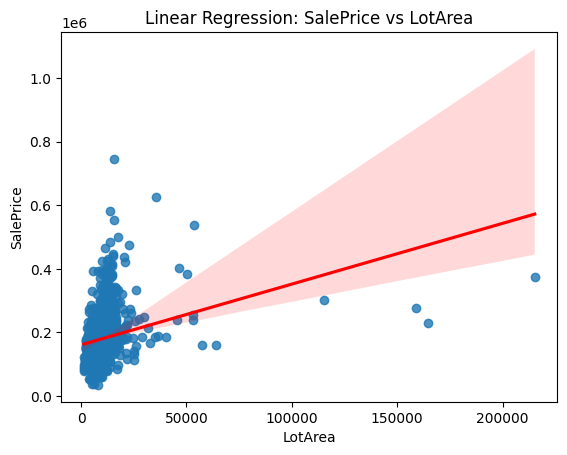

In [18]:
# Alegeți una sau mai multe variabile care se potrivesc cu SalePrice și dezvoltați un model de regresie.
ols_data = numeric_df[["LotArea", "SalePrice"]].dropna()

ols_formula = "SalePrice ~ LotArea"

OLS = ols(formula=ols_formula, data=ols_data)

model1 = OLS.fit()

print(model1.summary())

sns.regplot(x="LotArea", y="SalePrice", data=ols_data, line_kws={"color": "red"})
plt.title("Linear Regression: SalePrice vs LotArea")
plt.show()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.32e-25
Time:                        00:33:03   Log-Likelihood:                -12042.
No. Observations:                 951   AIC:                         2.409e+04
Df Residuals:                     949   BIC:                         2.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.061e+05   7436.929     14.264      

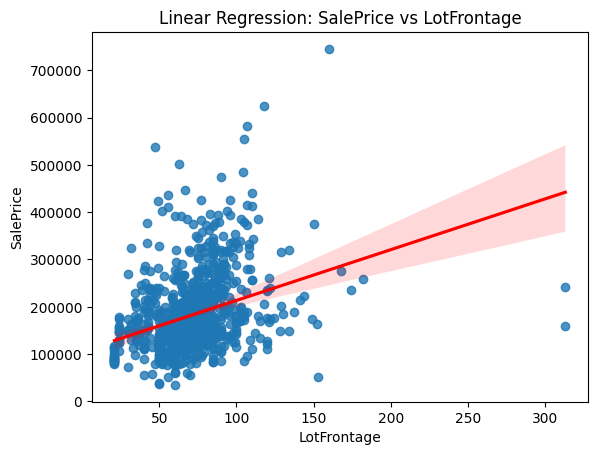

In [19]:
ols_data = numeric_df[["LotFrontage", "SalePrice"]].dropna()

ols_formula = "SalePrice ~ LotFrontage"

OLS = ols(formula=ols_formula, data=ols_data)

model2 = OLS.fit()

print(model2.summary())

sns.regplot(x="LotFrontage", y="SalePrice", data=ols_data, line_kws={"color": "red"})
plt.title("Linear Regression: SalePrice vs LotFrontage")
plt.show()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.117
Date:                Wed, 15 Oct 2025   Prob (F-statistic):            0.00259
Time:                        00:33:04   Log-Likelihood:                -14798.
No. Observations:                1168   AIC:                         2.960e+04
Df Residuals:                    1166   BIC:                         2.961e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.905e+05   3761.864     50.650      0.0

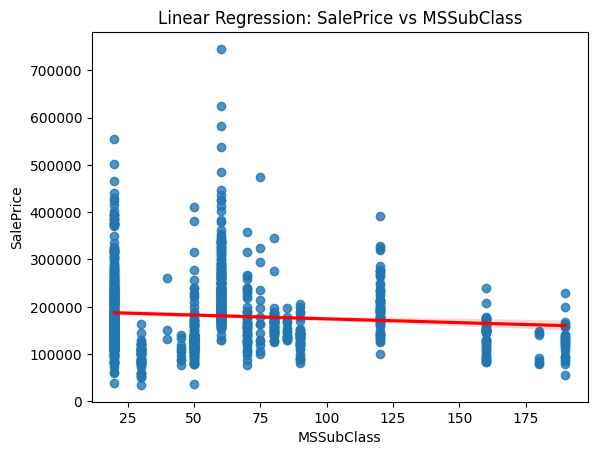

In [20]:
ols_data = numeric_df[["MSSubClass", "SalePrice"]].dropna()

ols_formula = "SalePrice ~ MSSubClass"

OLS = ols(formula=ols_formula, data=ols_data)

model3 = OLS.fit()

print(model3.summary())

sns.regplot(x="MSSubClass", y="SalePrice", data=ols_data, line_kws={"color": "red"})
plt.title("Linear Regression: SalePrice vs MSSubClass")
plt.show()

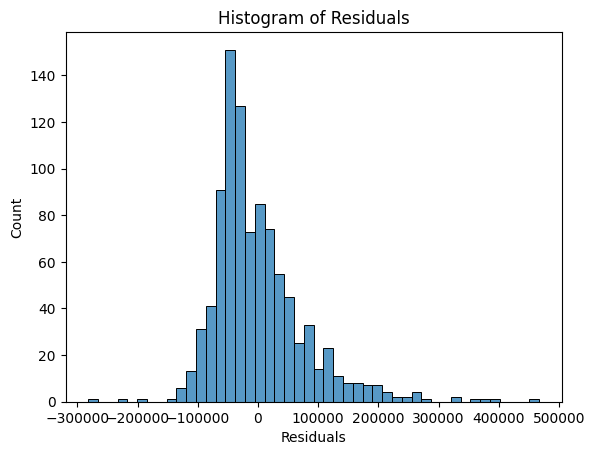

In [28]:
residuals = model2.resid
fitted_values = model2.fittedvalues

sns.histplot(residuals)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

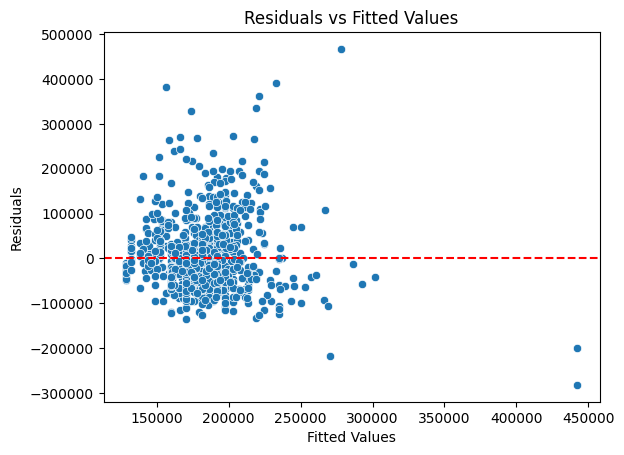

In [29]:
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

###  Concluzie finala

În urma analizarii plot-urilor, se observa ca rezidurile sunt **aproape normale**, dar usor **right-skewed**,  ceea ce indica faptul ca modelul **nu trece complet testul de normalitate**.  
De asemenea, rezidurile **nu sunt distribuite aleator**, ci mai degraba **comprimate**,  sugerand ca modelul **nu respectă ipoteza de homoscedasticitate**.
